In [31]:
# importando as bibliotecas a serem utilizadas
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Considerando a base de dados de populacao_brasileira.json responda as questões abaixo (os dados são fictícios).



### Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

In [32]:
# fazendo o upload da base de dados no colab
files.upload()

{}

In [33]:
# demonstrando o dataframe
df = pd.read_csv('/content/populacao_brasileira.csv')
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [34]:
# criando uma copia do df para as analises
df_pop_br = df.copy()
df_pop_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [35]:
# reconhecendo o df
df_pop_br.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


In [36]:
# identificando os valores unicos por coluna do df
df_pop_br.nunique()

,0
Unnamed: 0,1000
estado,27
idade,47
escolaridade,4
nível de proficiência em inglês,3
renda,998
sexo,2


In [37]:
# identificando colunas do df
df_pop_br.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

In [38]:
# removendo coluna unnamed e renomeando coluna nível de proeficiência em ingles seguindo boas praticas
df_pop_br.drop('Unnamed: 0', axis='columns', inplace=True)
df_pop_br.rename({'nível de proficiência em inglês': 'proficiencia_ingles'}, axis='columns', inplace=True)
df_pop_br.head()

,estado,idade,escolaridade,proficiencia_ingles,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


## 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [39]:
# calculando a probabilidade de todas as proeficiencias
prob_proficiencia = df_pop_br['proficiencia_ingles'].value_counts(normalize=True)
prob_proficiencia

,proportion
proficiencia_ingles,
Avançado,0.344
Intermediário,0.329
Básico,0.327


In [40]:
# demonstrando a probabilidade de sair pessoas que não são fluentes em ingles
prob_nao_fluente = df_pop_br['proficiencia_ingles'].value_counts(normalize=True)[1:3].sum()

print(f'A probabilidade complementar é de {prob_nao_fluente:.2%}')

A probabilidade complementar é de 65.60%


## 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [41]:
# criando um df somente com pessoas do alagoas e do pará
df_al_pa = df_pop_br[(df_pop_br['estado'] == 'AL') | (df_pop_br['estado'] == 'PA')]

In [42]:
# demonstrando qual a probabilidade dela ter a renda maior que 5000 mil reais.
prob_renda_5mil = df_al_pa[df_al_pa['renda'] > 5000].shape[0] / df_al_pa.shape[0]

print(f'A probabilidade de ela ter uma renda superior a 5 mil reais é de {prob_renda_5mil:.2%}')

A probabilidade de ela ter uma renda superior a 5 mil reais é de 5.06%


## 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [43]:
# criando um df com pessoas do amazonas
df_am = df_pop_br[df_pop_br['estado'] == 'AM']
df_am.head()

,estado,idade,escolaridade,proficiencia_ingles,renda,sexo
2,AM,32,Fundamental,Intermediário,3835.69,M
5,AM,38,Fundamental,Avançado,4441.57,F
13,AM,57,Médio,Básico,2844.32,M
23,AM,38,Médio,Intermediário,5075.40,M
45,AM,31,Pós-graduação,Básico,5270.69,F


In [44]:
# demonstrando a probabilidade da pessoa ter escolaridade Superior neste estado
prob_ensino_superior = df_am[df_am['escolaridade'] == 'Superior'].shape[0] / df_am.shape[0]

print(f'A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de {prob_ensino_superior:.2%}')

A probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas é de 23.68%


In [45]:
# demonstrando a probabilidade da pessoa ter ensino superior completo (Superior e Pós-graduação)
prob_am_sup_e_pos = df_am[(df_am['escolaridade'] == 'Superior') | (df_am['escolaridade'] == 'Pós-graduação')].shape[0] / df_am.shape[0]

print(f'A probabilidade de uma pessoa ter ensino superior completo e pós no estado do Amazonas é de {prob_am_sup_e_pos:.2%}')

A probabilidade de uma pessoa ter ensino superior completo e pós no estado do Amazonas é de 55.26%


In [46]:
# demonstrando qual a probabilidade da quinta pessoa sorteada ser amazonese e ter nivel superior
prob_am_superior = df_pop_br[(df_pop_br['estado'] == 'AM') & (df_pop_br['escolaridade'] == 'Superior')].shape[0] / df_pop_br.shape[0]

print(f'A probabilidade da quinta pessoa sorteada ser amazonese e ter nivel superior é de {prob_am_superior:.2%}')

A probabilidade da quinta pessoa sorteada ser amazonese e ter nivel superior é de 0.90%


## 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [47]:
# demonstrando a faixa de renda e a proporcao
faixas_renda = pd.cut(df_pop_br['renda'], range(0, 7500, 1500))
faixas_renda.value_counts(normalize=True).sort_index()

,proportion
renda,
"(0, 1500]",0.055
"(1500, 3000]",0.414
"(3000, 4500]",0.442
"(4500, 6000]",0.089


In [48]:
# demonstrando onde esta concentrada a maioria da populacao
frequencia_renda = faixas_renda.value_counts().sort_index()
maior_frequencia = frequencia_renda.idxmax()

print(f"A maioria das rendas estão concentradas no valor entre: {maior_frequencia}")

A maioria das rendas estão concentradas no valor entre: (3000, 4500]


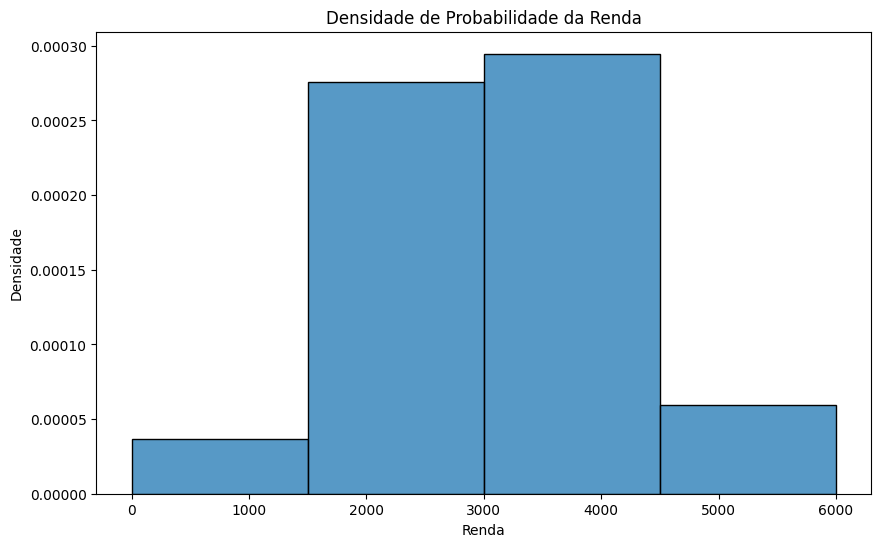

In [73]:
# definindo a faixa de renda para demonstrar no grafico
faixa_renda_grafico = np.arange(0, df_pop_br['renda'].max() + 1500, 1500)

# plotando o grafico de densidade de probabilidade
plt.figure(figsize=(10, 6))
sns.histplot(df_pop_br['renda'], bins=faixa_renda_grafico, stat='density')
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.title('Densidade de Probabilidade da Renda')
plt.show()

## 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [74]:
# calculando a media de renda
df_pop_br['renda'].mean()

print(f'A média de renda é de {df_pop_br["renda"].mean():.2f} mil reais')

A média de renda é de 3082.54 mil reais


In [77]:
# calculando a variancia da renda
df_pop_br['renda'].var()

print(f'A variancia de renda é de {df_pop_br["renda"].var():.2f}')

A variancia de renda é de 993156.23


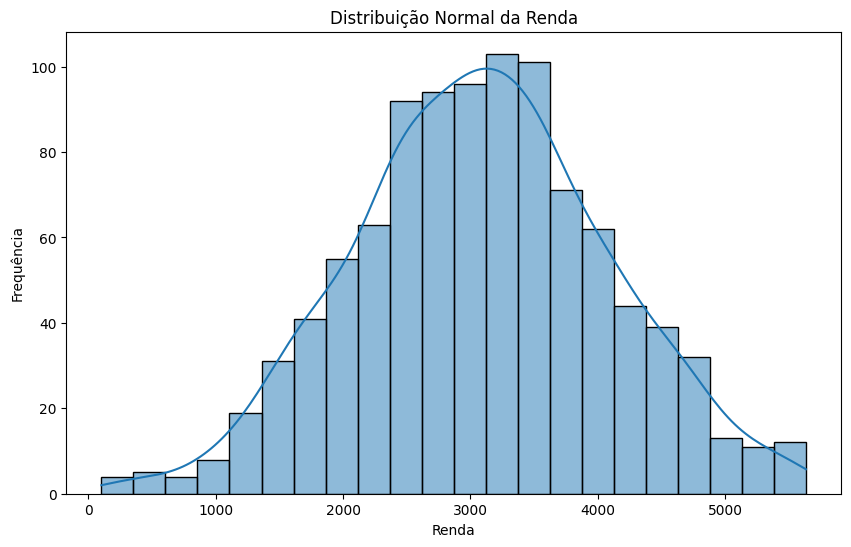

In [81]:
# demonstrando a curva normal de renda

plt.figure(figsize=(10, 6))
sns.histplot(df_pop_br['renda'], kde=True)
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.title('Distribuição Normal da Renda')
plt.show()


## 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [89]:
# calculando probabilidade de pessoas com pos-graduacao
prob_pos = df_pop_br[df_pop_br['escolaridade'] == 'Pós-graduação'].shape[0] / df_pop_br.shape[0]

# considerando amostra de 1milhão, qual a probabilidade de encontrarmos 243 mil pessoas com pós?

k = 243000
n = 1000000

prob_243mil = stats.binom.pmf(k, n, prob_pos)

print(f'A probabilidade de encontrarmos 243 mil pessoas com pós-graduação é de {prob_243mil}')

A probabilidade de encontrarmos 243 mil pessoas com pós-graduação é de 1.1104854289794913e-119


## 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade

In [54]:
# calculando a densidade para coluna escolaridade
df_pop_br['escolaridade'].value_counts(normalize=True)

,proportion
escolaridade,
Fundamental,0.266
Pós-graduação,0.253
Superior,0.243
Médio,0.238


In [55]:
# calculando densidade acumulada para cada nível de escolaridade
df_pop_br['escolaridade'].value_counts(normalize=True).cumsum()

,proportion
escolaridade,
Fundamental,0.266
Pós-graduação,0.519
Superior,0.762
Médio,1.000


## 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?



In [56]:
# calculando proporção de pessoas com nível de inglês intermediário
prob_intermediario = df_pop_br[df_pop_br['proficiencia_ingles'] == 'Intermediário'].shape[0] / df_pop_br.shape[0]

# calculando margem de erro amostração desta proporção
margem_erro = stats.norm.ppf(0.975) * np.sqrt(prob_intermediario * (1 - prob_intermediario) / df_pop_br.shape[0])


print(f'A margem de erro amostral é de {margem_erro:.2%}')

A margem de erro amostral é de 2.91%


## 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [57]:
# calculando a renda media e desvio padrao da amostra
renda_media = df_pop_br['renda'].mean()
renda_desvio = df_pop_br['renda'].std()

# criando uma variavel de 1000 reais superior a media
renda_superior = renda_media + 1000

# calculando a probabilidade de encontrar 60 pessoas com renda 1000 reais superior a média
prob_60 = 1 - stats.norm.cdf(renda_superior, loc=renda_media, scale=renda_desvio)

print(f'A probabilidade de encontrar 60 pessoas com uma renda de 1000 reais superior à média é de {prob_60:.2%}')

A probabilidade de encontrar 60 pessoas com uma renda de 1000 reais superior à média é de 15.78%


## 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [58]:
# criando particao de estados
mapa_regioes = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'AM': 'Norte', 'PA': 'Norte', 'AP': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte', 'AC': 'Norte',
    'BA': 'Nordeste', 'PE': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste', 'PI': 'Nordeste',
    'PB': 'Nordeste', 'SE': 'Nordeste', 'AL': 'Nordeste', 'MA': 'Nordeste'
}

# criando coluna de regiao
df_pop_br['regiao'] = df_pop_br['estado'].map(mapa_regioes)
df_pop_br.head()

,estado,idade,escolaridade,proficiencia_ingles,renda,sexo,regiao
0,MA,56,Fundamental,Intermediário,4006.29,F,Nordeste
1,BA,46,Superior,Básico,2423.11,M,Nordeste
2,AM,32,Fundamental,Intermediário,3835.69,M,Norte
3,CE,60,Superior,Básico,1870.29,M,Nordeste
4,SE,25,Fundamental,Avançado,3529.80,M,Nordeste


In [59]:
# criando a probabilidade aleatoria proposta no exercicio
prob_aleatoria = df_pop_br[(df_pop_br['regiao'] == 'Sudeste') & (df_pop_br['sexo'] == 'M') & (df_pop_br['escolaridade'] == 'Fundamental') & (df_pop_br['renda'] > 2000)].shape[0]

# fazendo o calculo da probabilidade de acordo com a amostra
prob_aleatoria = prob_aleatoria / df_pop_br.shape[0]

print(f'A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de {prob_aleatoria:.2%}')

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de 1.90%
